# Catalog of WFC3 Transmission and Emission Spectra

In this notebook we'll look at the whole catalog of transmission and emission spectra available from HST WFC3. If there are spectra missing, you could try [opening an issue](https://github.com/christinahedges/ombre/issues/new) against `ombre`.

You can see all the notebooks that make these spectra by clicking the links on the left hand side.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ombre.query import get_nexsci
from ombre import Spectrum, Spectra
from astropy.io import fits
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-white')
from glob import glob
import numpy as np

In [3]:
from astropy.constants import G, k_B, m_p
import astropy.units as u
import numpy as np
def get_eqt(period, st_mass=1, st_rad=1, st_teff=5777, A=0.3):
    M = st_mass*u.solMass
    P = period*u.day
    R = st_rad*u.solRad
    T = st_teff*u.K
    a = (((G*M/(4*np.pi**2)) * P**2)**(1/3)).to(u.solRad)
    return T * np.sqrt(R/(2*a)) * (1 - A)**0.25

In [4]:
def get_H(teq, mass, rad):
    mu = m_p * 2
    g = ((G * mass * u.solMass)
        / (rad * u.solRad) ** 2
    ).to(u.m / u.s ** 2)
    return ((k_B * teq)/(mu * g)).to(u.km)

In [5]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

# Transmission Spectra

Text(0.5, 1.0, 'Exoplanet Atmosphere Transmission Spectra')

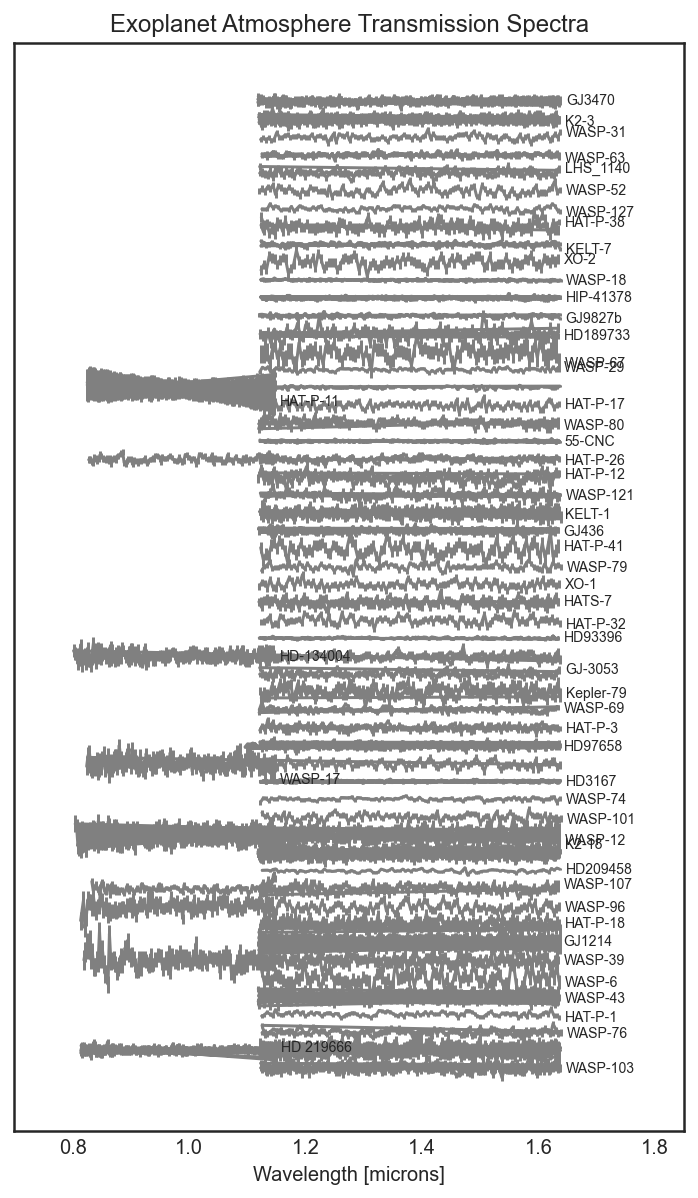

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(6, 10))
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten()
    x, y, ye = sp.wavelength.value, sp.spec.value, sp.spec_err.value
    plt.errorbar(x, y + idx * 3000, ye, ms=0.1, color='grey', zorder=-1)
#    im = plt.scatter(x, y + idx * 3000, c=np.ones_like(y), vmin=3000, vmax=7000, cmap='coolwarm_r', s=5)
    plt.text(x[np.isfinite(y)][-1] + 0.01, y[np.isfinite(y)][-1] + idx * 3000, name, ha='left', va='center', size=7)
plt.xlim(0.7, 1.85)
plt.xlabel('Wavelength [microns]')
plt.yticks([])
#cbar = plt.colorbar(im)
#cbar.set_label('Stellar Temperature [K]')
plt.title('Exoplanet Atmosphere Transmission Spectra')

<ErrorbarContainer object of 3 artists>

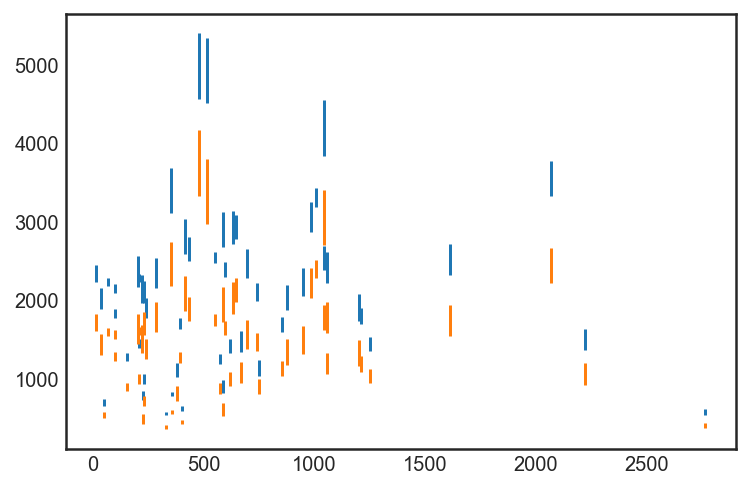

In [38]:
nbins = 100
Hs = []
vs = []
vs_test = []
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten()
    k = (sp.wavelength.value > 1.2) & (sp.wavelength.value < 1.6)
    x, y, ye = sp.wavelength.value[k], sp.spec.value[k], sp.spec_err.value[k]
    teq = get_eqt(sp.meta['period'], sp.meta['st_mass'], sp.meta['st_rad'], sp.meta['st_teff']).value
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    Hs.append(H)
    vs.append(np.diff(np.nanpercentile(np.random.normal(y, ye, size=(nbins, y.shape[0])), [5, 95], axis=1), axis=0).ravel())
    vs_test.append(np.diff(np.nanpercentile(np.random.normal(0, ye, size=(nbins, y.shape[0])), [5, 95], axis=1), axis=0).ravel())
plt.errorbar(Hs, np.mean(vs, axis=1), np.std(vs, axis=1), ls='')
plt.errorbar(Hs, np.mean(vs_test, axis=1), np.std(vs, axis=1), ls='')

In [ ]:
nbins = 100
Hs = []
vs = []
vs_test = []
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten()
    k = (sp.wavelength.value > 1.2) & (sp.wavelength.value < 1.6)
    x, y, ye = sp.wavelength.value[k], sp.spec.value[k], sp.spec_err.value[k]
    teq = get_eqt(sp.meta['period'], sp.meta['st_mass'], sp.meta['st_rad'], sp.meta['st_teff']).value
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    Hs.append(H)
    vs.append(np.diff(np.nanpercentile(np.random.normal(y, ye, size=(nbins, y.shape[0])), [5, 95], axis=1), axis=0).ravel())
    vs_test.append(np.diff(np.nanpercentile(np.random.normal(0, ye, size=(nbins, y.shape[0])), [5, 95], axis=1), axis=0).ravel())
plt.errorbar(Hs, np.mean(vs, axis=1), np.std(vs, axis=1), ls='')
plt.errorbar(Hs, np.mean(vs_test, axis=1), np.std(vs, axis=1), ls='')

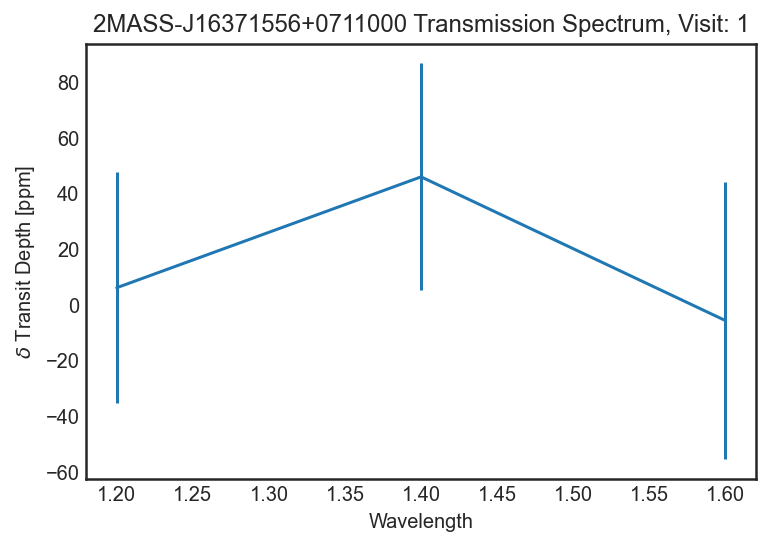

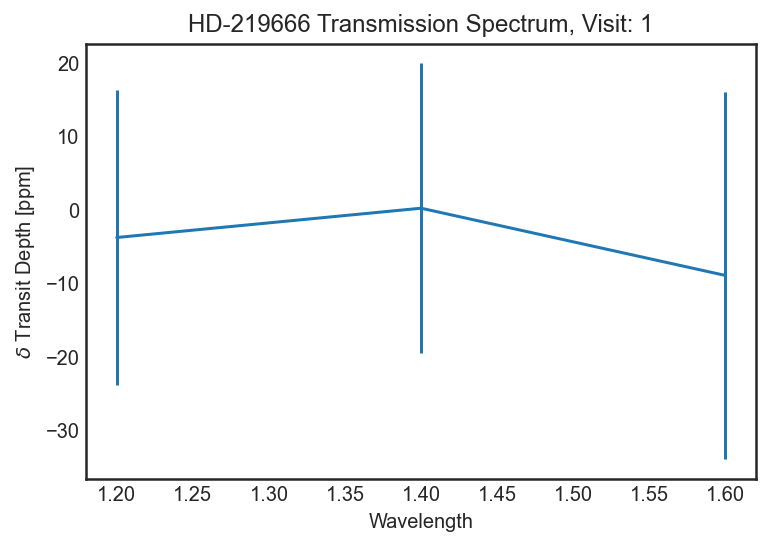

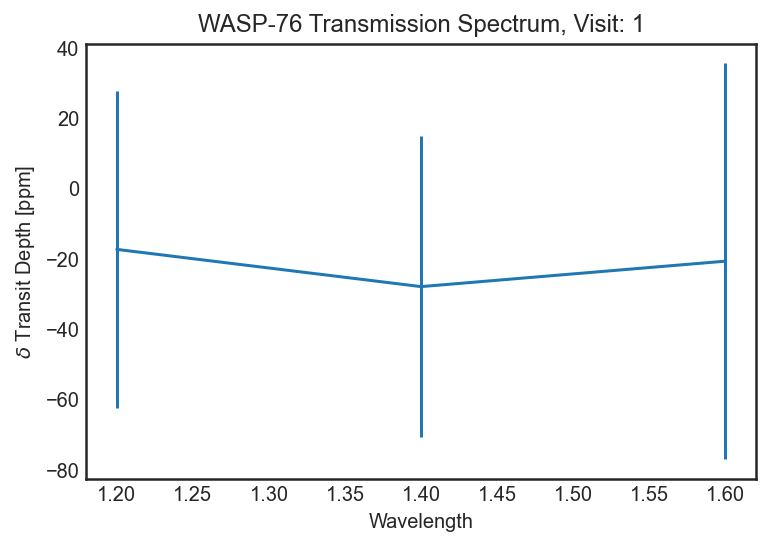

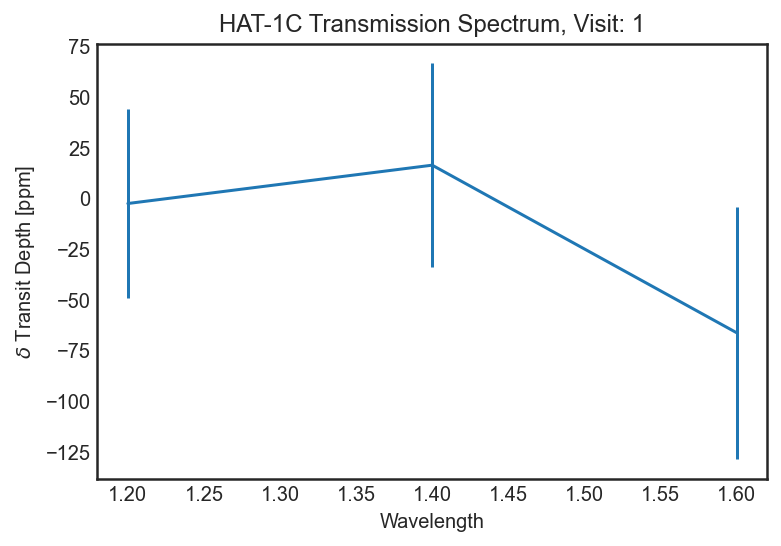

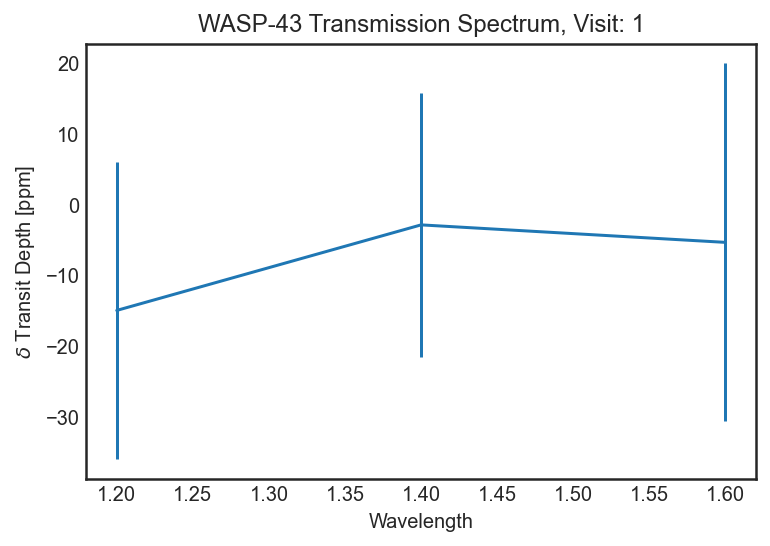

In [53]:
for idx, fname in enumerate(glob('results/*transmission.fits')[:5]):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname).flatten()
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    bsp = sp.bin([1.1, 1.3, 1.5, 1.65])
    e1 = (bsp.spec_err[0]**2 + bsp.spec_err[2]**2)**0.5/2
    e2 = bsp.spec_err[1]
    e = (e1**2 + e2**2)**0.5/2
    d = (bsp.spec[1]) - (bsp.spec[0] + bsp.spec[2])
    plt.errorbar(H, d, e)

In [57]:
bsp.spec[1]

<Quantity -2.87398813 ppm>

<Quantity 12.43233456 ppm>

<Quantity 12.43233456 ppm>

(-600.0, 600.0)

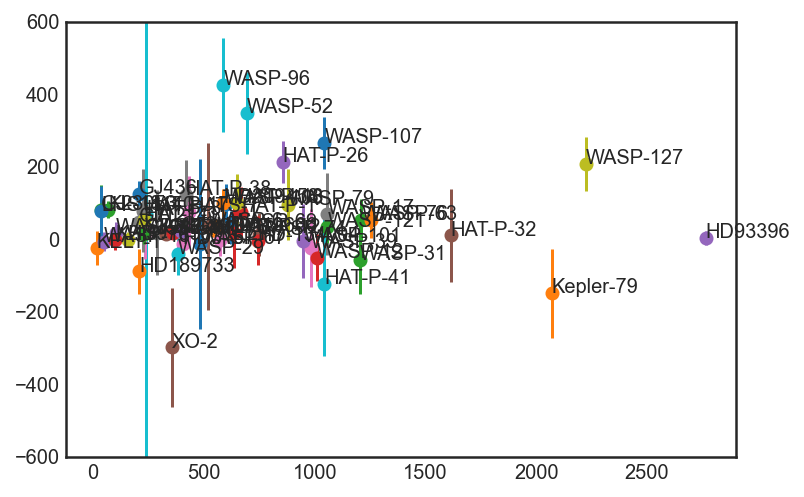

In [48]:
nbins = 100
Hs = []
vs1 = []
vs2 = []
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten()
    teq = get_eqt(sp.meta['period'], sp.meta['st_mass'], sp.meta['st_rad'], sp.meta['st_teff']).value
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    Hs.append(H)
    k = (sp.wavelength.value > 1.3) & (sp.wavelength.value < 1.45)
    x, y, ye = sp.wavelength.value[k], sp.spec.value[k], sp.spec_err.value[k]
    vs1.append(np.nanmean(np.random.normal(y, ye, size=(nbins, y.shape[0])), axis=1).ravel())
    k = ((sp.wavelength.value <= 1.3) | (sp.wavelength.value >= 1.45)) & (sp.wavelength.value > 1.2) & (sp.wavelength.value < 1.6)
    x, y, ye = sp.wavelength.value[k], sp.spec.value[k], sp.spec_err.value[k]
    vs2.append(np.nanmean(np.random.normal(y, ye, size=(nbins, y.shape[0])), axis=1).ravel())
    plt.errorbar(Hs[idx], np.mean(vs1[idx]) - np.mean(vs2[idx]), np.hypot(np.std(vs1[idx]), np.std(vs2[idx])), ls='', marker='o')
    plt.text(Hs[idx], np.mean(vs1[idx]) - np.mean(vs2[idx]), name)
    
    #break
plt.ylim(-600, 600)

In [8]:
nbins = 100
Hs = []
st_teffs = []
ar = []
ar_err = []
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten().bin(np.linspace(1.15, 1.65, 100))
    st_teffs.append(sp.meta['st_teff'])
    teq = get_eqt(sp.meta['period'], sp.meta['st_mass'], sp.meta['st_rad'], sp.meta['st_teff']).value
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    Hs.append(H)
    ar.append(sp.spec)
    ar_err.append(sp.spec_err)
ar = np.asarray(ar)[np.argsort(Hs)]
ar_err = np.asarray(ar_err)[np.argsort(Hs)]
fnames = np.asarray(glob('results/*transmission.fits'))[np.argsort(Hs)]
st_teffs = np.asarray(st_teffs)[np.argsort(Hs)]
Hs = np.sort(Hs)
ar, ar_err, Hs, st_teffs, fnames = ar[::-1], ar_err[::-1], Hs[::-1], st_teffs[::-1], fnames[::-1]

In [50]:
ar = np.asarray(ar)[np.argsort(Hs)]
ar_err = np.asarray(ar_err)[np.argsort(Hs)]
fnames = np.asarray(glob('results/*transmission.fits'))[np.argsort(Hs)]
st_teffs = np.asarray(st_teffs)[np.argsort(Hs)]
Hs = np.sort(Hs)
ar, ar_err, Hs, st_teffs, fnames = ar[::-1], ar_err[::-1], Hs[::-1], st_teffs[::-1], fnames[::-1]

In [51]:
#nb = 50
k = (st_teffs > 5000) #& (Hs > Hs[nb])
avg = np.average(ar[k], axis=0, weights=1/(np.nan_to_num(ar_err[k]) + 1e-10))
avg_err = np.average((ar[k] - avg)**2, axis=0, weights=1/ar_err[k])**0.5
avg_err /= ar[k].shape[0]**0.5

from astropy.convolution import convolve, Gaussian1DKernel
v = [convolve(np.random.normal(avg, avg_err), Gaussian1DKernel(2)) for idx in range(50)]
avg = np.mean(v, axis=0)
avg_err = np.std(v, axis=0)/(50**0.5)

<ErrorbarContainer object of 3 artists>

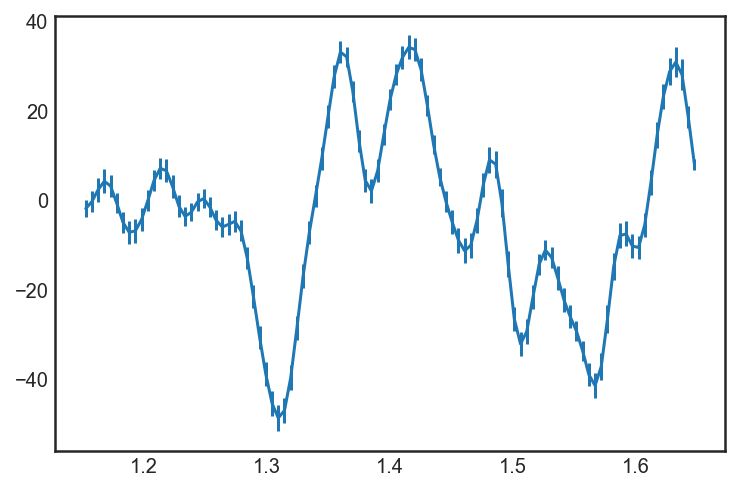

In [52]:
plt.errorbar(sp.wavelength.value, avg, avg_err)

In [53]:
ws, wes = np.zeros((2, ar.shape[0], 50))
for jdx in range(50):
    X = np.vstack([np.nan_to_num(np.random.normal(avg, avg_err))[None, :]]).T
    for idx in range(ar.shape[0]):
        e = ar_err[idx][:, None]
        y = ar[idx]
        k = np.isfinite(y) & np.isfinite(e[:, 0])
        sigma_w_inv = X[k].T.dot(X[k]/e[k]**2)
        w = np.linalg.solve(sigma_w_inv, X[k].T.dot(y[k]/e[k, 0]**2))[0]
        we = np.linalg.inv(sigma_w_inv).diagonal()[0]**0.5
        #plt.errorbar(Hs[idx], w, we, marker='.')
        ws[idx, jdx] = w
        wes[idx, jdx] = we
ws, wes = np.mean(ws, axis=1), np.sum(wes**2, axis=1)**0.5/(50**0.5)

[Text(0.5, 0, 'Stellar Effective Temperature'),
 Text(0, 0.5, 'w'),
 (-5.0, 15.0)]

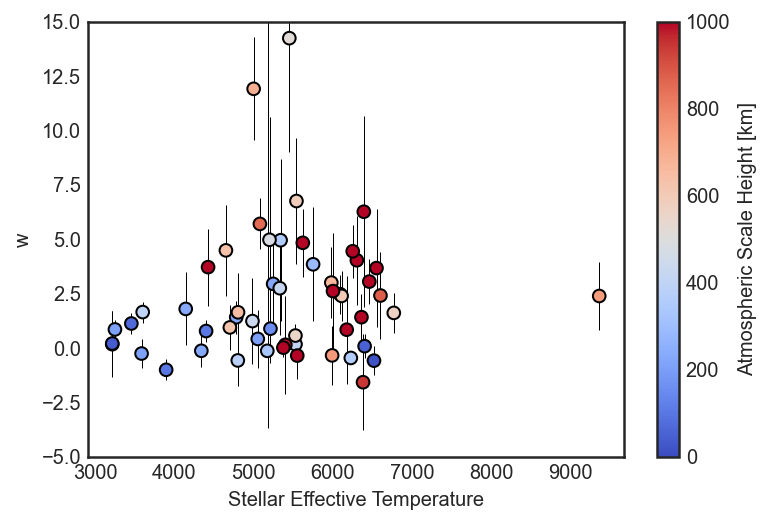

In [54]:
fig, ax = plt.subplots()
ax.errorbar(st_teffs, ws, wes, ls='', marker='.', c='k', zorder=1, lw=0.5)
im = ax.scatter(st_teffs[np.argsort(Hs)], ws[np.argsort(Hs)], c=Hs[np.argsort(Hs)], cmap='coolwarm', zorder=10, vmin=0, vmax=1000, s=40, edgecolor='k')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Atmospheric Scale Height [km]')
ax.set(xlabel=('Stellar Effective Temperature'), ylabel='w', ylim=(-5, 15))

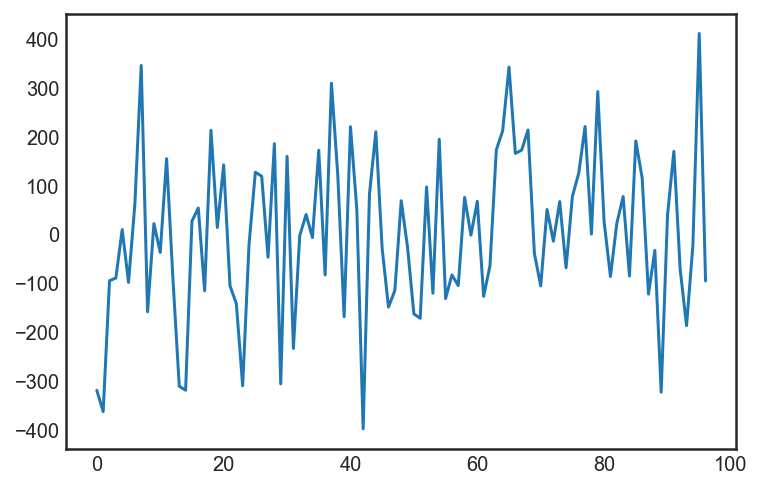

In [55]:
plt.plot(y)
plt.plot(X.dot(np.linalg.solve(sigma_w_inv, X.T.dot(y/e[:, 0]))))

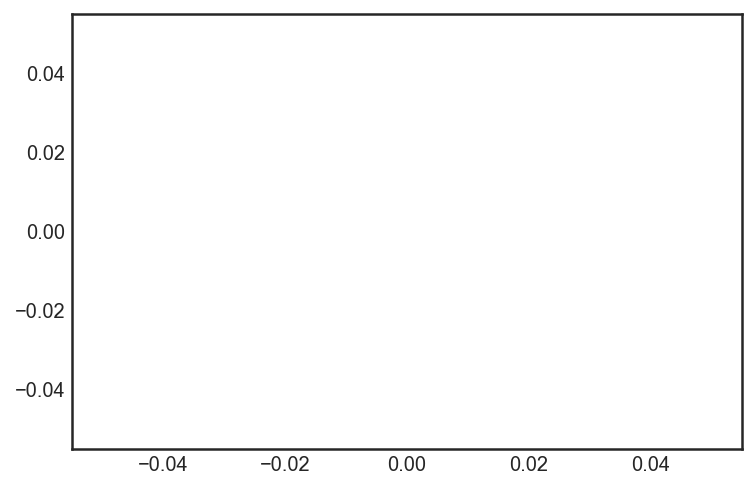

In [56]:
plt.plot(X.dot(np.linalg.solve(sigma_w_inv, X.T.dot(y/e[:, 0]))))

<ErrorbarContainer object of 3 artists>

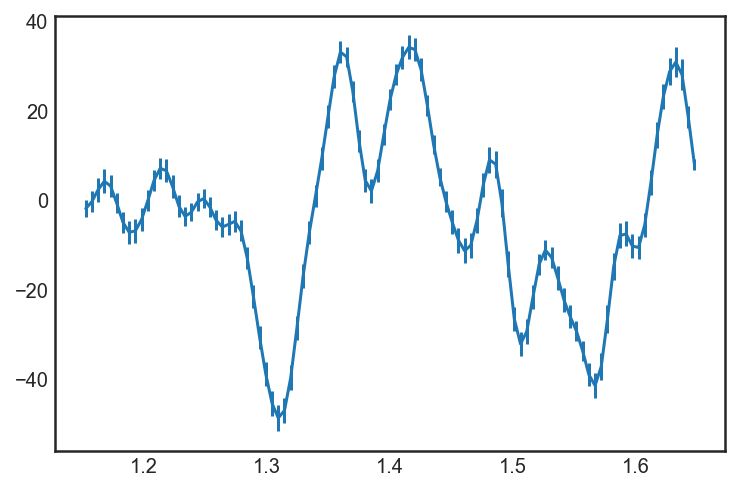

In [57]:
plt.errorbar(sp.wavelength.value, avg, avg_err)

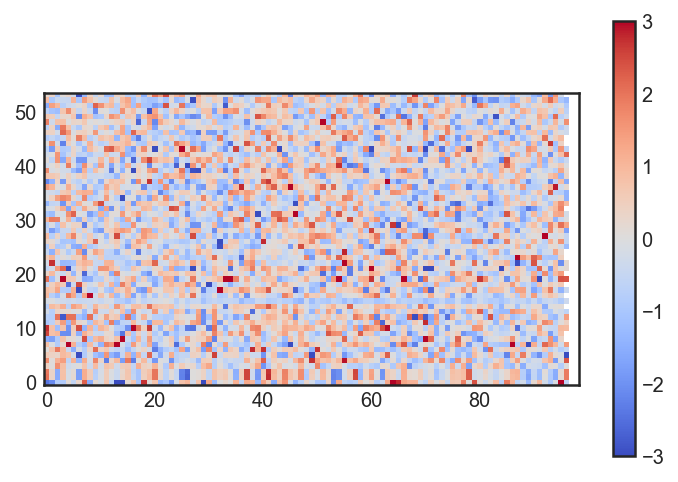

In [198]:
plt.imshow(ar, vmin=-3, vmax=3, cmap='coolwarm', origin='lower')
plt.colorbar()

<ErrorbarContainer object of 3 artists>

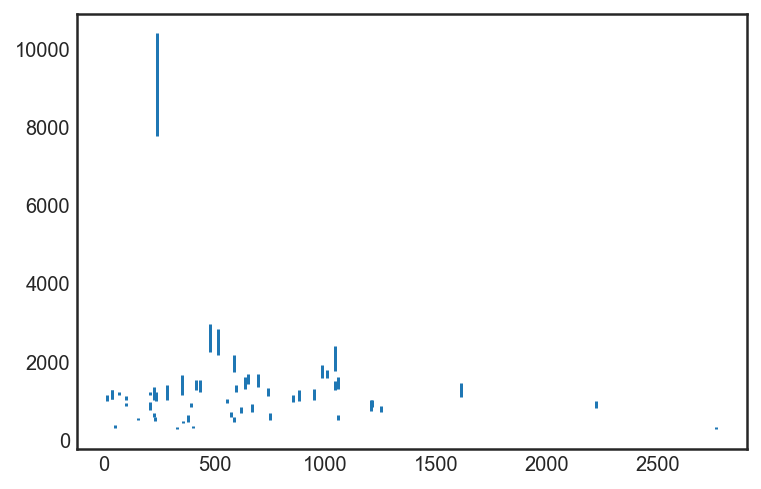

In [153]:
plt.errorbar(Hs, np.mean(vs1, axis=1) - np.mean(vs2, axis=1), np.hypot(np.std(vs1, axis=1), np.std(vs2, axis=1)), ls='')

<ErrorbarContainer object of 3 artists>

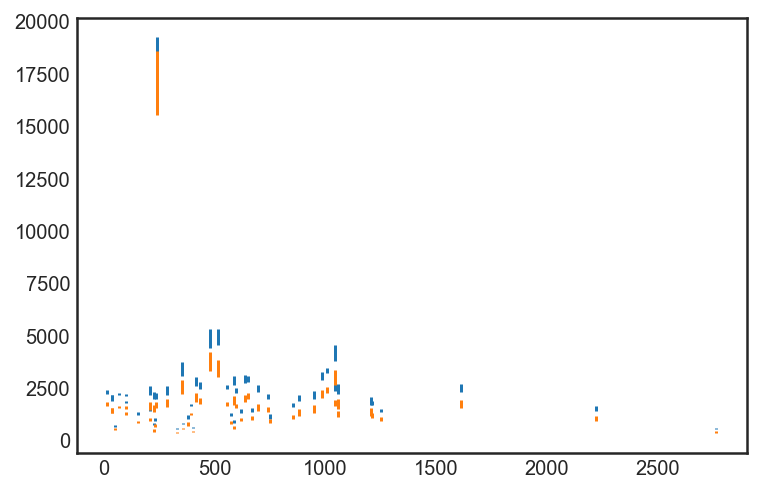

In [114]:
plt.errorbar(Hs, np.mean(vs, axis=1), np.std(vs, axis=1), ls='')
plt.errorbar(Hs, np.mean(vs_test, axis=1), np.std(vs, axis=1), ls='')
#plt.yscale('log')
#plt.xscale('log')

IndexError: invalid index to scalar variable.

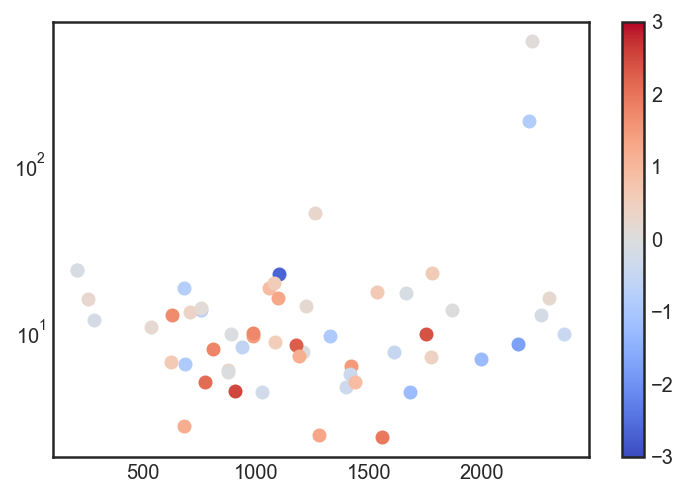

In [336]:
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten()
    x, y, ye = sp.wavelength, sp.spec, sp.spec_err
    k = (x >= 1.25) & (x <= 1.5) & (np.isfinite(y))
    avg1 = np.average(y[k], weights=ye[k])
    er1 = np.average((y[k] - avg)**2, weights=ye[k])**0.5/(k.sum()**0.5)
    k = (((x >= 1.2) & (x <= 1.25)) | ((x >= 1.5) & (x <= 1.55))) & (np.isfinite(y))
    avg2 = np.average(y[k], weights=ye[k])
    er2 = np.average((y[k] - avg)**2, weights=ye[k])**0.5/(k.sum()**0.5)
    teq = get_eqt(sp.meta['period'], sp.meta['st_mass'], sp.meta['st_rad'], sp.meta['st_teff']).value
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    V = (4 / 3 * np.pi * ((sp.meta['radius']) * u.solRad) ** 3)
    dens = ((sp.meta['mass'] *  u.solMass)/ V).to(u.g / u.cm ** 3).value
    #plt.text(H, avg1 - avg2, f' {name}', color='grey', size=10)
    #plt.errorbar(H, avg1 - avg2, np.hypot(er1, er2), ls='', marker='.', c='grey', zorder=-1)
    #scat = plt.scatter(H, avg1 - avg2, c=sp.meta['mass']*(u.solMass.to(u.jupiterMass)), vmin=0, vmax=1, cmap='coolwarm', s=50, zorder=10)
    
    
    g = ((G * sp.meta['mass'] * u.solMass)
        / (sp.meta['radius'] * u.solRad) ** 2).to(u.m / u.s ** 2)
    scat = plt.scatter(teq, g, c=(avg1-avg2)/np.hypot(er1, er2), vmin=-3, vmax=3, cmap='coolwarm')
    plt.yscale('log')
    
plt.colorbar(scat)

UnitConversionError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

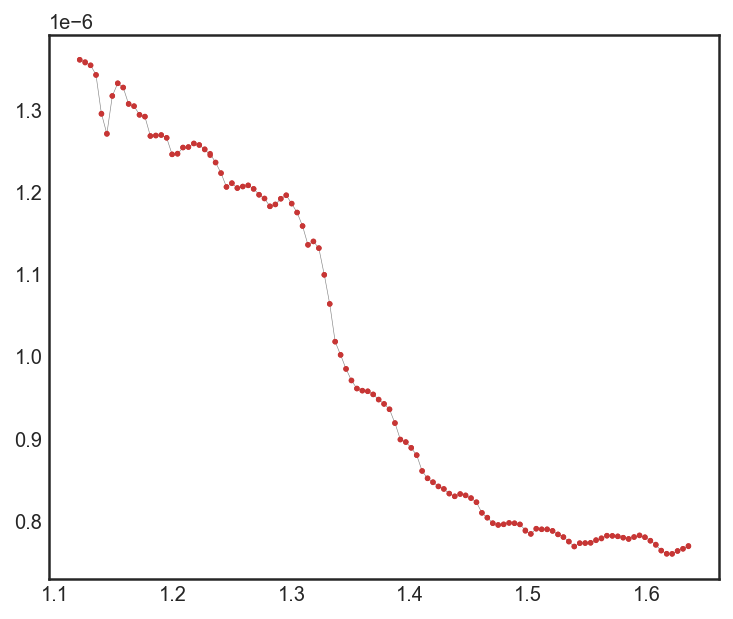

In [390]:
fig, axs = plt.subplots(1, 1, figsize=(6, 5))
axs = [axs]
fnames = np.sort(np.asarray(glob('results/*_stellar_spectrum.fits')))
f = fnames[np.where(np.asarray([Spectra.from_file(fname)[0].meta['st_teff'] for fname in fnames]) < 4000)]
s = np.argsort([Spectra.from_file(fname)[0].meta['st_teff'] for fname in f])
for jdx, label in enumerate(['G141']):
    ax = axs[jdx]
    kdx = 0 
    for idx, fname in enumerate(f[s]):
        hdu = fits.open(fname)
        name = '_'.join(fname.split('/')[1].split('_')[:-2])
        sp = Spectra.from_file(fname)
        k = np.where([v == label for v in sp.visits])[0]
        if len(k) == 0:
            continue
        sp = sp[k].flatten()
        x, y, ye = sp.wavelength * 1e-4, sp.spec +  kdx*0.15, sp.spec_err
        im = ax.scatter(x, y, c=np.ones_like(y) + sp.meta['st_teff'], vmin=3000, vmax=7000, cmap='coolwarm_r', s=3, zorder=1)
        ax.plot(x, y, c='grey', lw=0.3, zorder=-1)
        ax.text(x[-1] + 0.01, y[-1], name, ha='left', va='center', size=7)
        kdx += 1
    ax.set(xlabel= ('Wavelength [microns]'), yticks=[], title=f'Stellar Spectra {label}')

    ax.set_xlim(1.05, 1.85)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Stellar Temperature [K]')

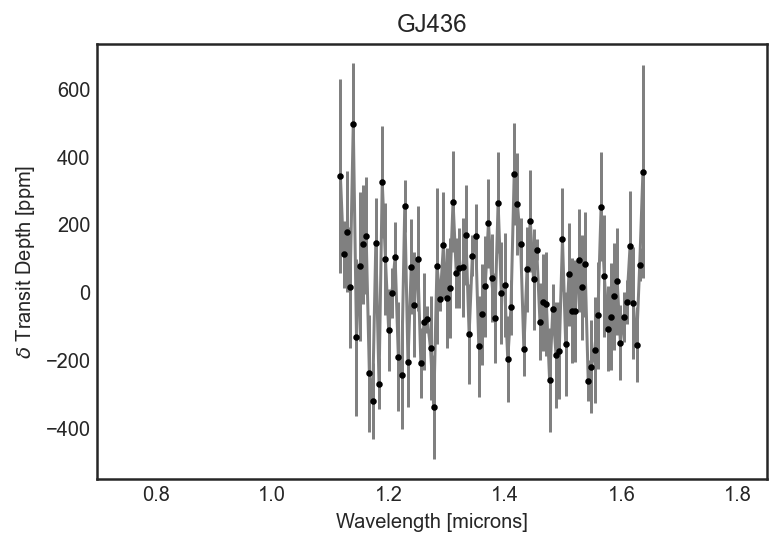

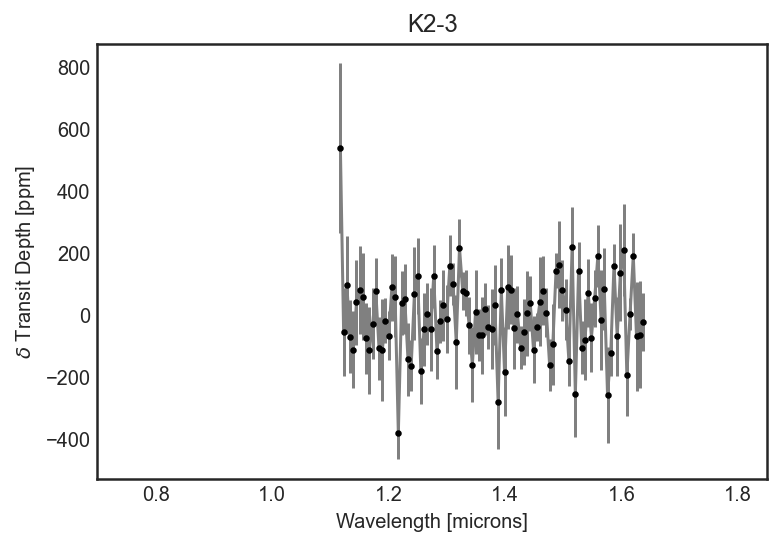

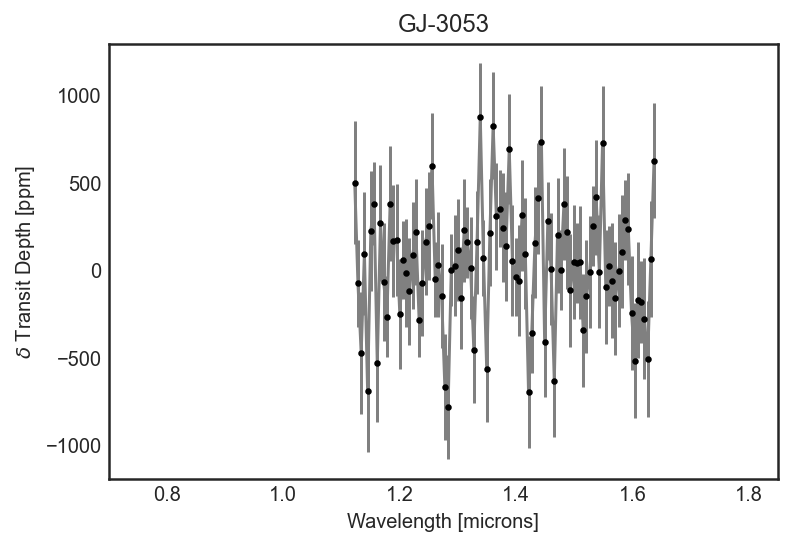

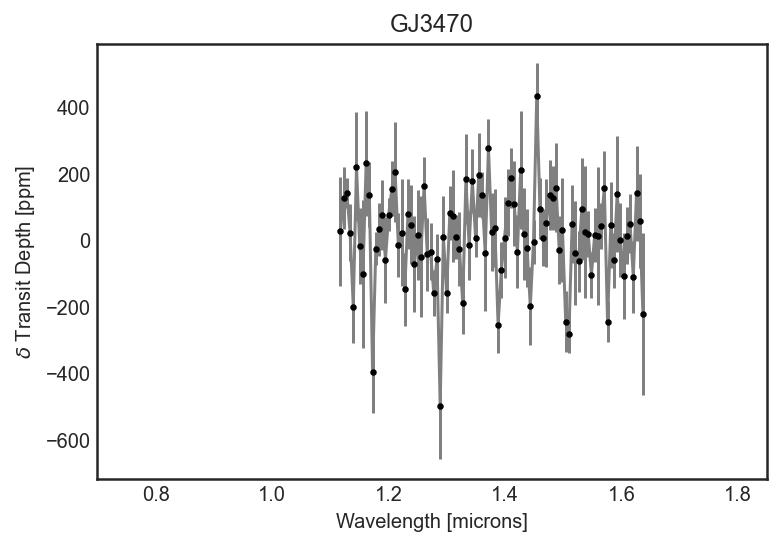

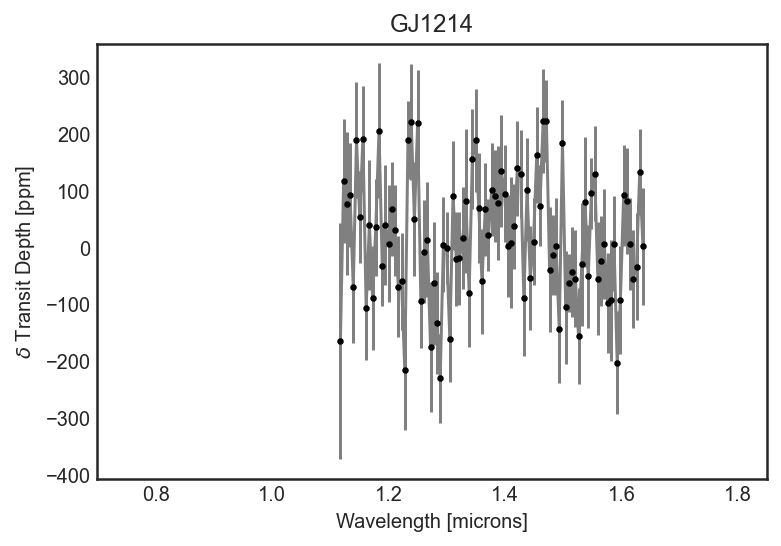

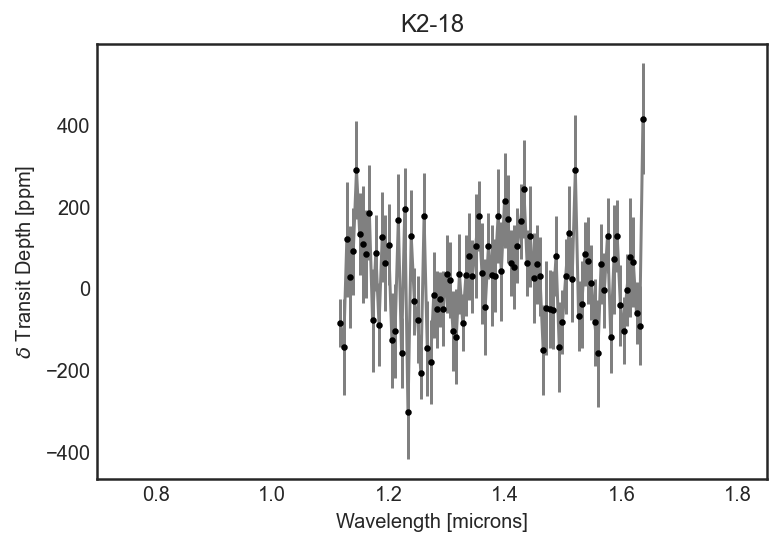

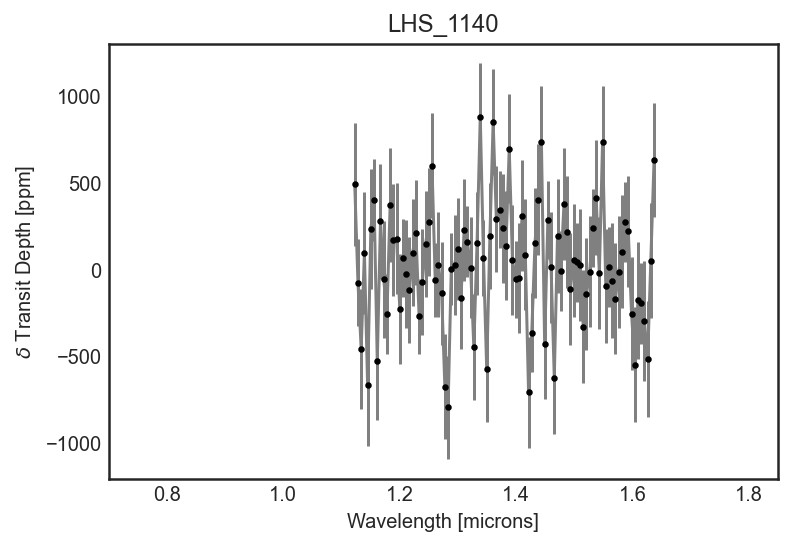

In [392]:
fnames2 = glob('results/*transmission.fits')
fnames = np.asarray(glob('results/*_stellar_spectrum.fits'))
f = fnames[np.where(np.asarray([Spectra.from_file(fname)[0].meta['st_teff'] for fname in fnames]) < 4000)]
fnames2 = [f'results/{"_".join(f1.split("/")[-1].split("_")[:-2])}_transmission.fits' for f1 in f]

for idx, fname in enumerate(fnames2):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    plt.figure()
    if not os.path.isfile(fname):
        continue
    sp = Spectra.from_file(fname)
    sp = sp.flatten().bin(np.linspace(0.7, 1.8, 200))
    x, y, ye = sp.wavelength.value, sp.spec.value, sp.spec_err.value
    plt.errorbar(x, y, ye, ms=0.1, color='grey', zorder=-1)
    im = plt.scatter(x, y, c='k', s=5)
    plt.title(name)
    plt.xlim(0.7, 1.85)
    plt.xlabel('Wavelength [microns]')
    plt.ylabel('$\delta$ Transit Depth [ppm]')#

## Emission Spectra

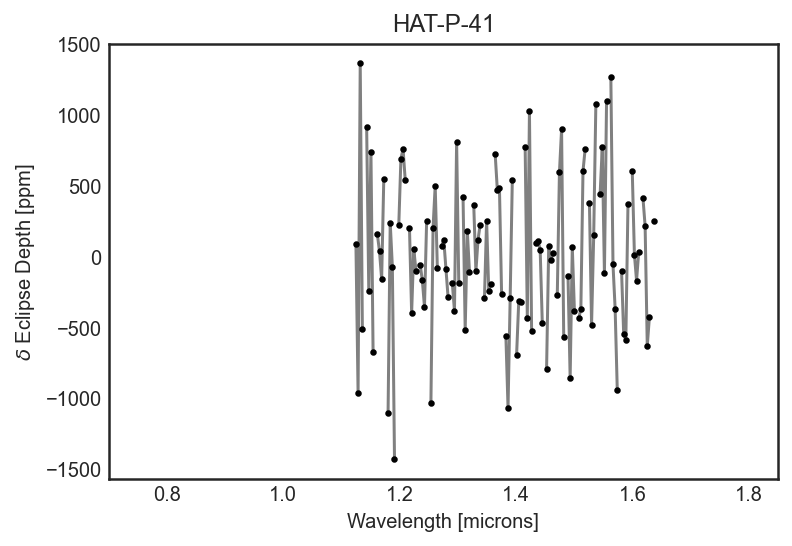

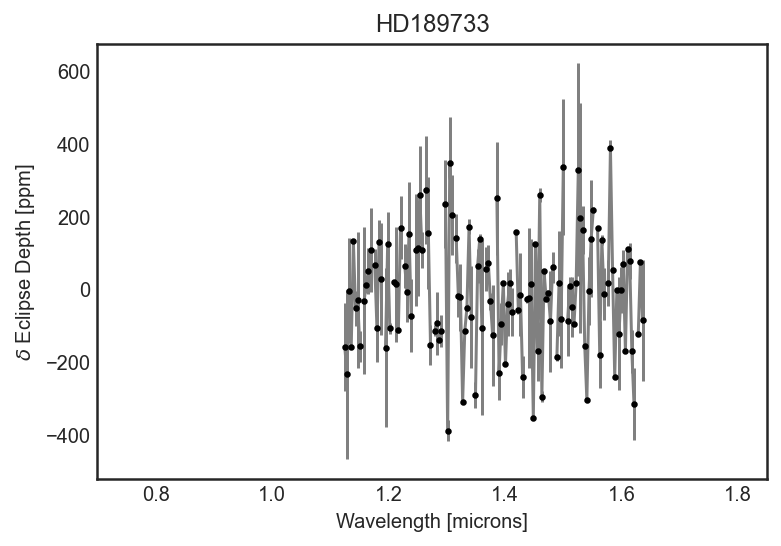

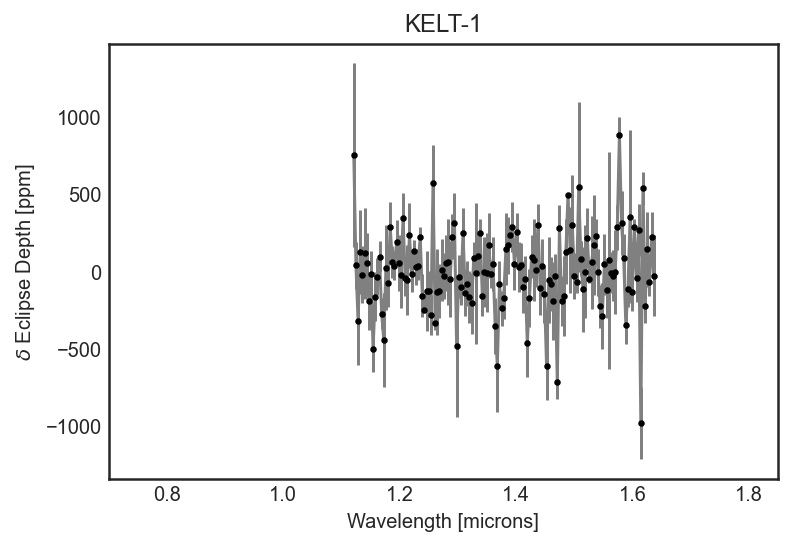

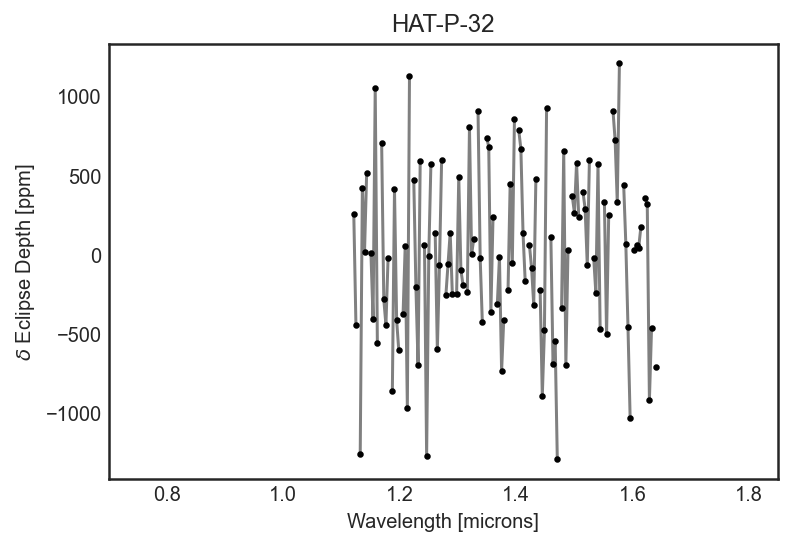

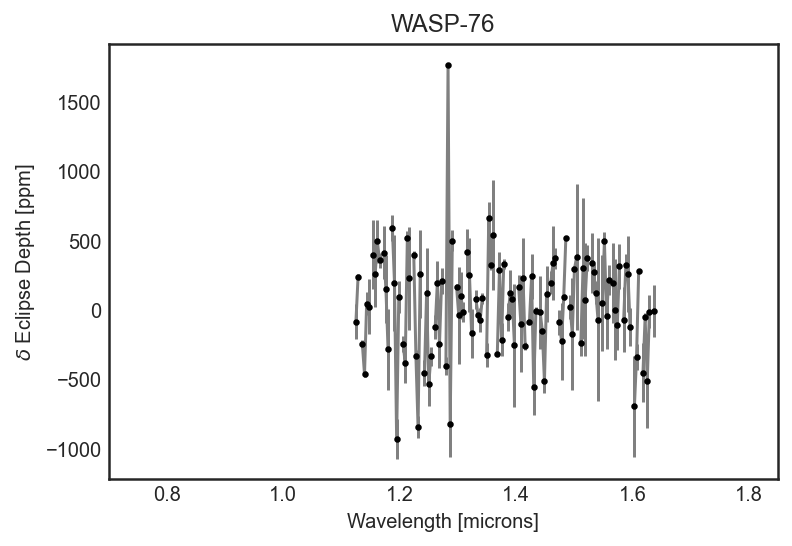

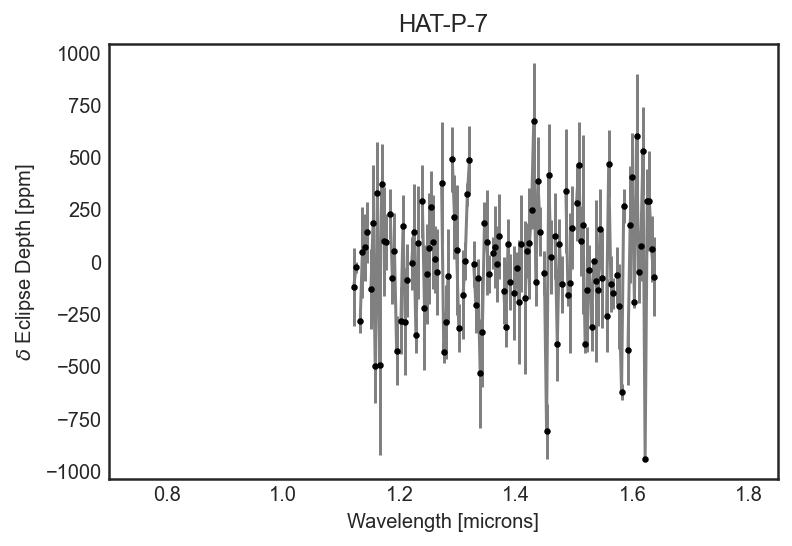

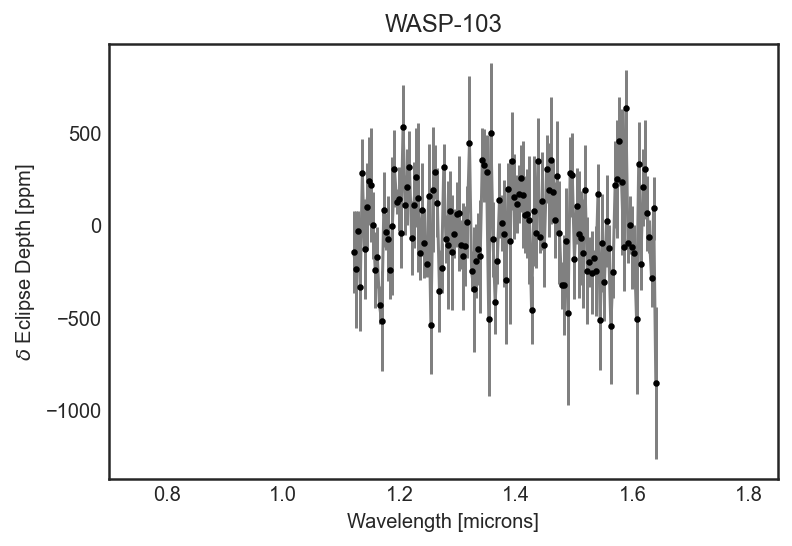

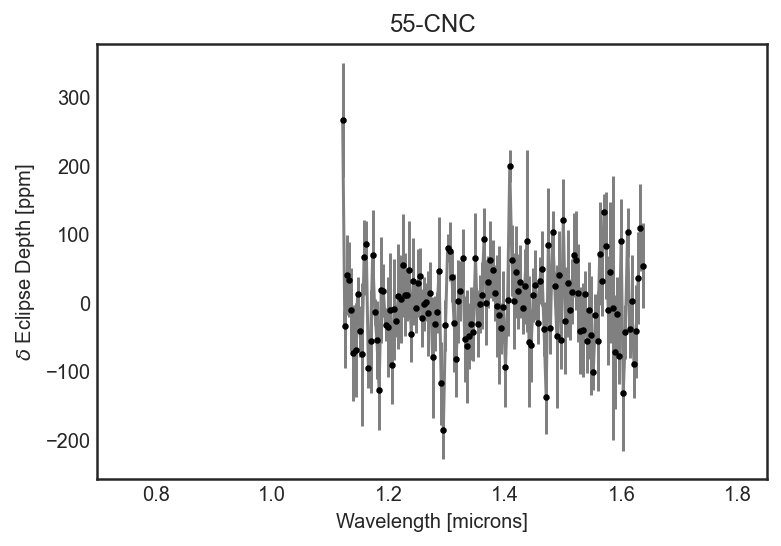

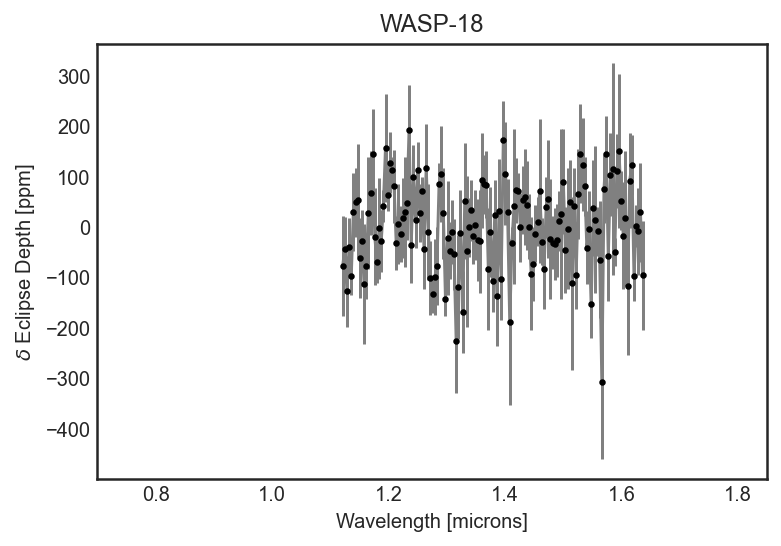

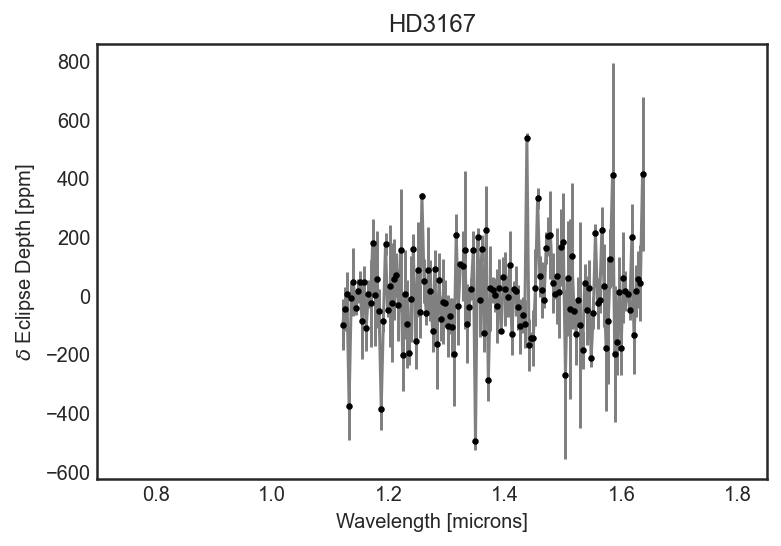

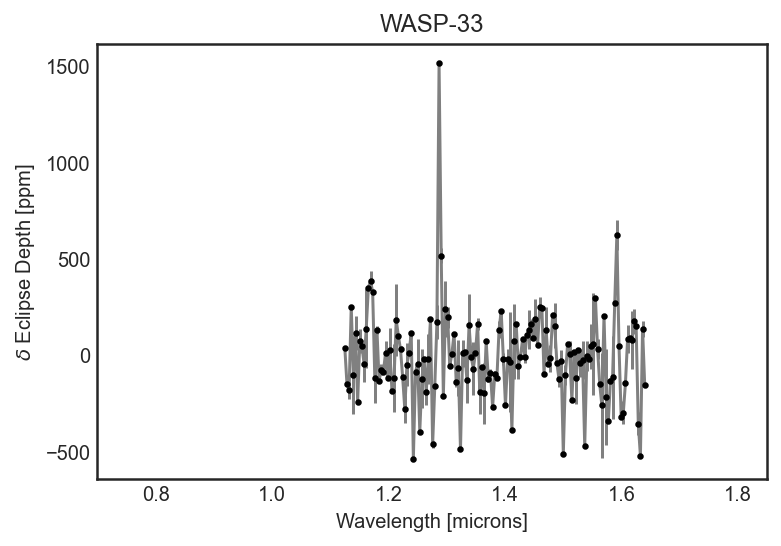

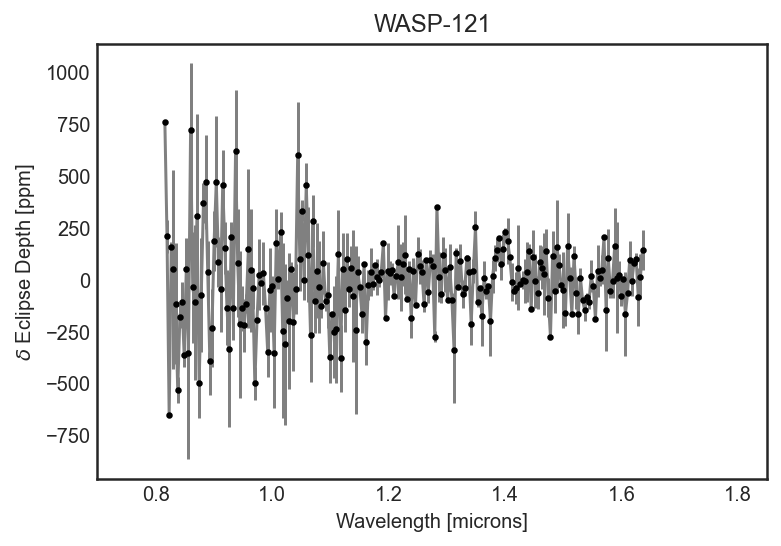

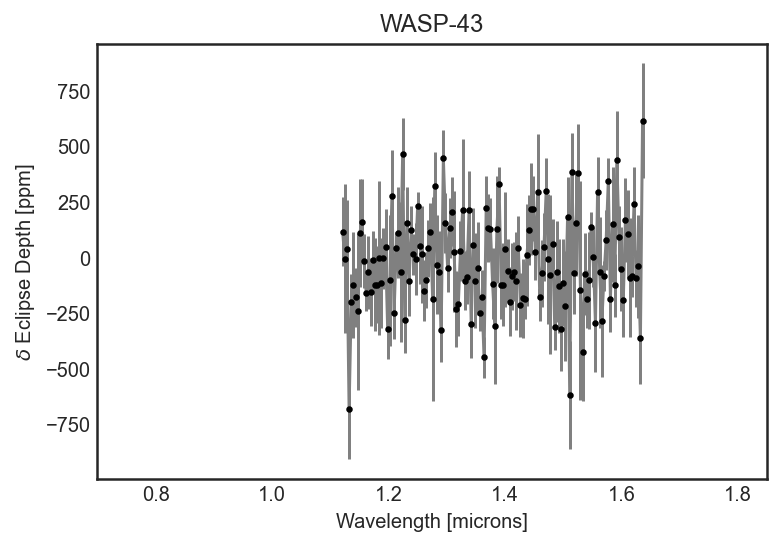

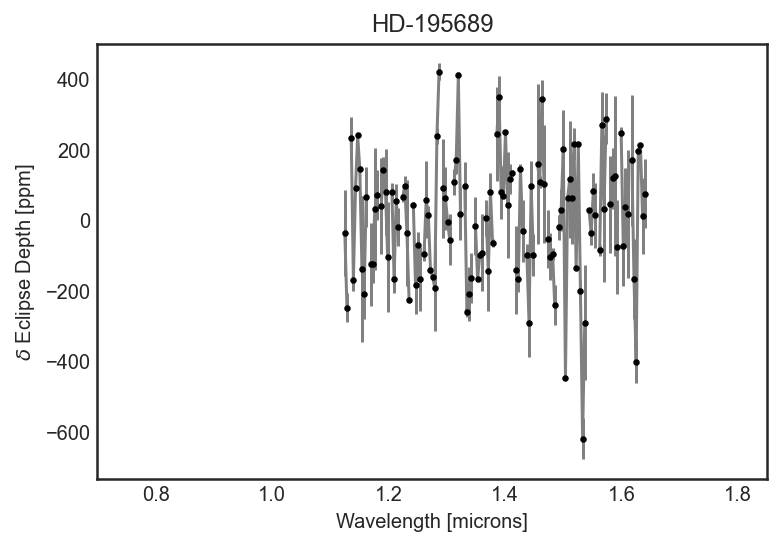

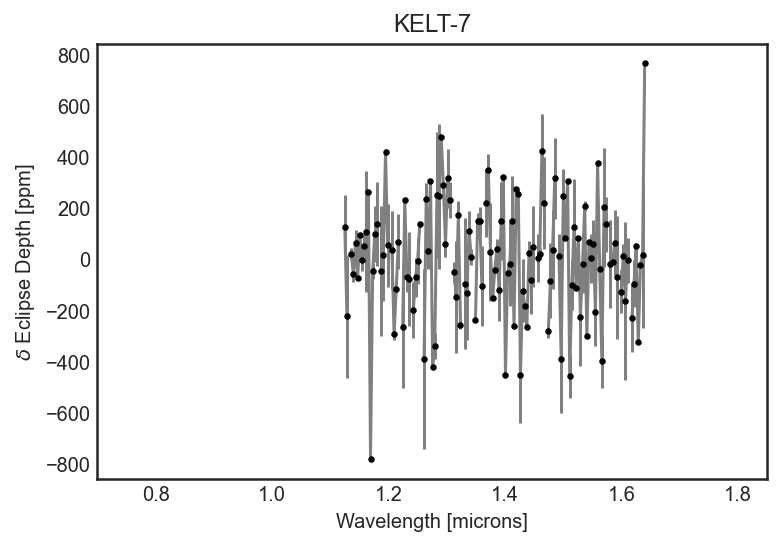

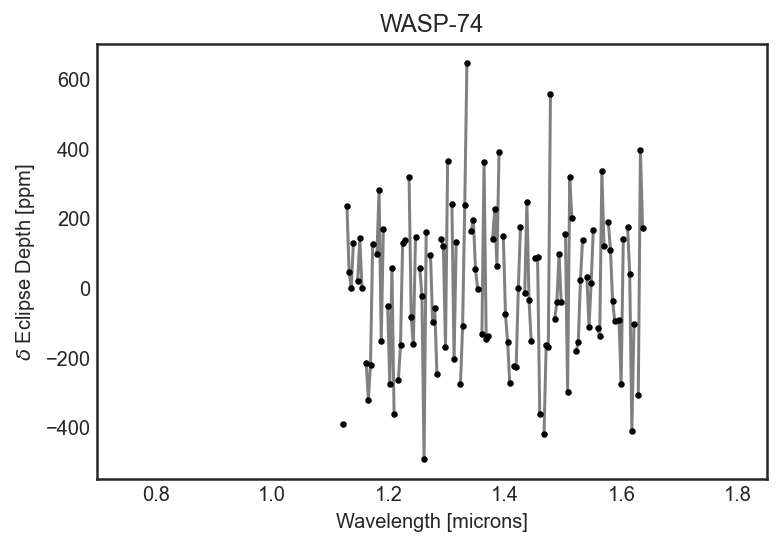

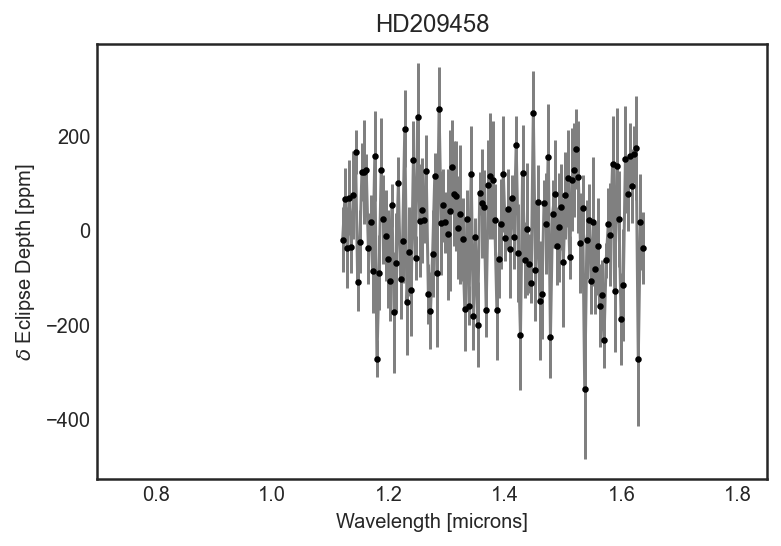

In [298]:
for idx, fname in enumerate(glob('results/*emission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    if not os.path.isfile(fname):
        continue
    plt.figure()
    sp = Spectra.from_file(fname)
    sp = sp.flatten().bin(np.linspace(0.7, 1.8, 300))
    x, y, ye = sp.wavelength, sp.spec, sp.spec_err
    plt.errorbar(x, y, ye, ms=0.1, color='grey', zorder=-1)
    im = plt.scatter(x, y, c='k', s=5)
    plt.title(name)
    plt.xlim(0.7, 1.85)
    plt.xlabel('Wavelength [microns]')
    plt.ylabel('$\delta$ Eclipse Depth [ppm]')#